In [493]:
#Importing numpy library
import numpy as np

In [494]:
#Download Dataset
import urllib
urllib.request.urlretrieve("https://raw.githubusercontent.com/llSourcell/Intro_to_the_Math_of_intelligence/master/data.csv","data.csv")

('data.csv', <http.client.HTTPMessage at 0x1c67126e748>)

In [495]:
#Read the dataset
import pandas as pd
headers = ['X','Y']
data_csv = pd.read_csv('data.csv', error_bad_lines=False, names=headers)
data_csv.head(10)

,X,Y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925
5,55.142188,78.211518
6,52.211797,79.641973
7,39.299567,59.171489
8,48.105042,75.331242
9,52.550014,71.300880


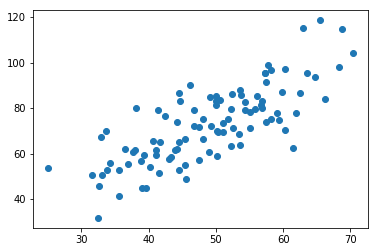

In [496]:
# Plotting the dataset
import matplotlib.pyplot as plt
x = data_csv['X']
y = data_csv['Y']


#Converting them into numpy array
X = np.array(x)
Y = np.array(y)

plt.scatter(X,Y)
plt.show()


Line equation : 
y = m * x + c 

y = output
m = slope  = (y2 - y1)/(x2 - x1)
c = y-intercept


Now our goal is to create a hypothesis function that can actually predict the value Y based on given X

Error = Y (output) - Y(predicted)

Means Squared error = 1/2 * (Y(output) - Y(predicted))^2

1/2 is taken to reduce the computational complexity

Derivates of Error with respect to m and c 


Recap of calculus - power rule y = x^n then dy/dx = n*x^(n-1)           - 1
                  -            y = f(g(x))  then dy/dx = f'(g(x))*g'(x) - 2 
                               x = constant then dy/dx = 0              - 3   
                               y = x  then dy/dx = 1                    - 4
                               
                               
Gradient are used to identify rate of change of output with respect to change in particular variable
y(predicted) = y = m*x + c , here y(output) is constant

Mean square error 

Error = 1/2 *( y(output) - y(predicted))^2
      = 1/2 *( y(output) - (m * x + c))^2
      
      
Applying derivaties with respect to m and c on error function

d(Error)/d(m) = 2 * (1/2 * (y(output) - (m * x + c)))     y(output) is constant

              =   -1 * (m * x + c ) * d(m* x +c)/d(m)   rule no : 2
              =  -1 * (m*x+c)* x
                                       
 m_gradient   = -x*(m*x + c)
              
d(Error)/d(c) = 2 * (1/2 *( y(output) - (m * x + c))
              = - (m * x + c)  
 
 c_gradient  = -(m*x+c)
 
 
 #sum it up 
 m_gradient   = -x*(m*x + c)
 c_gradient  = -(m*x+c)
 
 # updated gradient values 
 
 learning_rate = rate at  which the change will be added taken into by multiplying with gradient (eg: 0.01)
 
 m_updated_Value = m_original - (learning_rate * m_gradient)
 c_updated_value = c_original - (learning_rate * c_gradient)
 


In [497]:
#initialize m and c
m = 0.1
c = 0.1



Pseudo code for Gradient decent
1. Read  x and y variable
2. Initalize random values for m and c
3. For i in range(iterations)
     get value of y using m and c
     check error value
     update value of m and c
     repeat 


In [498]:
# taking iterations of 10000
iterations = 1000

In [499]:
#setting the learning rate
learning_rate = 0.01

In [500]:
def caliculate_error(x, y, m, c):
    y_predicted = m * x + c 
    error = (1/2)*((y - y_predicted)**2)
    error = np.mean(error)
    return  error

    

In [501]:
def update_value(x,m,c, learning_rate):
    m_gradient = -x*(m*x + c)
    c_gradient = -(m*x+c)
    print(m_gradient)
    print(c_gradient)
    m_new  = m - (learning_rate*m_gradient)
    c_new  = c - (learning_rate*c_gradient)

    return m_new, c_new

In [502]:
loss_values = []

In [503]:
# Extract M and C values 
for i in range(1000):
    loss_values.append(caliculate_error(X,Y,m,c))
    m_new, c_new = update_value(X,m,c, learning_rate)
    m = m_new
    c = c_new
    

[-108.89047933 -290.78501932 -384.75153168 -230.14119984 -363.74330435
 -309.58031315 -277.82835105 -158.37555091 -236.22000779 -281.40540324
 -210.83716166 -300.84518491 -199.46273175 -344.17394563 -327.4703342
 -244.56349139 -204.16327033 -369.60649523 -212.66793035 -154.55621413
 -444.7281639  -434.46758777 -230.19463795 -177.01097017 -273.97685922
 -358.42653283 -334.17464975 -411.05551946 -223.11426873 -260.65427569
 -277.95697632 -130.06383644 -184.32910524 -344.12782663 -336.42659432
 -211.02823633 -389.30386048 -112.82955307 -136.40187986 -145.71306241
 -202.97578468 -191.97918928 -255.73930591 -196.85012665 -403.16800613
 -109.99354642 -165.3546675  -292.38640101 -118.06492706 -425.1720933
 -149.12408079 -202.49784323 -168.89220554 -178.2335512  -266.1137228
 -308.86747444 -175.34939797 -396.8081904  -247.02264367 -173.05334148
 -173.71404666 -256.886008   -279.58800746 -256.37023904 -116.56109482
 -160.43854504 -320.67509376 -334.77670771 -369.26474181 -130.86044775
 -102.939

[ -2.61755785e+08  -1.93771662e+11  -1.32695904e+12  -3.92526899e+10
  -9.01372819e+11  -2.97665987e+11  -1.41839605e+11  -3.14344372e+09
  -4.68729224e+10  -1.54813583e+11  -2.16487469e+10  -2.44622178e+11
  -1.48677152e+10  -6.16132173e+11  -4.37720352e+11  -5.93760615e+10
  -1.74077578e+10  -1.00627375e+12  -2.29563544e+10  -2.66925461e+09
  -3.60561316e+12  -3.06871544e+12  -3.93147325e+10  -6.63809060e+09
  -1.28923891e+11  -8.14500091e+11  -5.03108356e+11  -2.09360645e+12
  -3.17911664e+10  -9.17065692e+10  -1.42289412e+11  -8.45269704e+08
  -8.72283684e+09  -6.15564728e+11  -5.26872423e+11  -2.17821626e+10
  -1.43901103e+12  -3.30559283e+08  -1.15945217e+09  -1.80027918e+09
  -1.67333414e+10  -1.14793773e+10  -8.05309133e+10  -1.35986959e+10
  -1.83167865e+12  -2.79652411e+08  -4.19815692e+09  -2.01199307e+11
  -4.45614776e+08  -2.64302818e+12  -2.10114839e+09  -1.64682980e+10
  -4.83981683e+09  -6.95316106e+09  -1.05655250e+11  -2.92996320e+11
  -6.22957165e+09  -1.64145215e+12

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in multiply
  


[ -3.87325948e+068  -7.16925483e+094  -3.39870883e+102  -3.10592344e+088
  -9.72371102e+100  -3.69390197e+096  -4.08850697e+093  -2.80298591e+078
  -1.58094406e+089  -9.13083108e+093  -1.32601683e+086  -6.09200057e+095
  -4.23518677e+084  -2.94880855e+099  -1.27539539e+098  -1.38334595e+090
  -1.79731222e+085  -2.67418471e+101  -2.27005344e+086  -6.28016233e+077
  -3.32714265e+106  -7.55552932e+105  -3.15123942e+088  -2.62393539e+081
  -1.70195082e+093  -3.83175389e+100  -4.58228441e+098  -2.24704861e+104
  -4.49267154e+087  -7.46790203e+091  -4.20908361e+093  -1.71150872e+073
  -3.20038450e+082  -2.92395130e+099  -7.00191991e+098  -1.40284080e+086
  -7.15971301e+102  -3.25205864e+069  -3.07069034e+074  -1.71295386e+076
  -1.25127251e+085  -3.95974752e+083  -2.26614377e+091  -1.86990126e+084
  -6.57714268e+103  -7.07802337e+068  -3.95729460e+079  -1.01266785e+095
  -4.95822014e+070  -1.91428977e+105  -7.03761737e+076  -1.08094676e+085
  -1.45465913e+080  -4.01200654e+081  -2.73861072e+

[-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf]
[-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf 

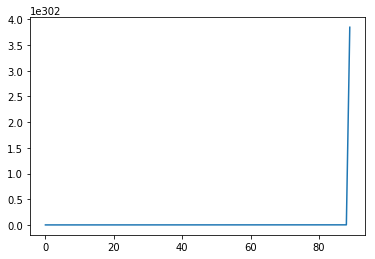

In [504]:
#plotting the loss_values

plt.plot(loss_values)
plt.show()